In [79]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

url = 'http://bayesian-bandit.adludio.com/'
r = requests.post(url +'dump_bandit_data', 
    json={'item_group_id_list': ['s2dmtni', 'wqgxoc1', 'uwyvrja'] } )
parsed = json.loads(r.content)
df = pd.DataFrame(parsed['bandit_data']).sort_values('date').reset_index(drop=True).drop(columns='id')
df

,item_id,item_group_id,date,created_at,num_success,num_trials,num_engagements,num_impressions,num_clickthroughs,daily_spend,revenue
0,ckpyp9j,s2dmtni,2020-08-03,2021-02-01 18:53:33,92,586,92,586,0,2.09,27.6
1,spijye8,s2dmtni,2020-08-03,2021-02-01 18:53:33,93,553,93,553,1,1.99,27.9
2,dyiyo3b,s2dmtni,2020-08-03,2021-02-01 18:53:33,42,271,42,271,0,1.03,12.6
3,spijye8,s2dmtni,2020-08-04,2021-02-01 18:53:33,526,5499,526,5499,2,22.15,157.8
4,dyiyo3b,s2dmtni,2020-08-04,2021-02-01 18:53:33,396,5191,396,5191,5,22.16,118.8
...,...,...,...,...,...,...,...,...,...,...,...
576,cbr81rt,uwyvrja,2020-11-15,2021-02-01 18:55:03,659,2815,659,2815,70,18.00,263.6
577,f755tsf,uwyvrja,2020-11-15,2021-02-01 18:55:02,765,3623,765,3623,71,24.00,306.0
578,158d2i4,uwyvrja,2020-11-15,2021-02-01 18:55:02,35,156,35,156,4,1.00,14.0
579,i4li3e7,uwyvrja,2020-11-15,2021-02-01 18:55:03,732,3446,732,3446,58,22.90,292.8


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            581 non-null    object 
 1   item_group_id      581 non-null    object 
 2   date               581 non-null    object 
 3   created_at         581 non-null    object 
 4   num_success        581 non-null    int64  
 5   num_trials         581 non-null    int64  
 6   num_engagements    581 non-null    int64  
 7   num_impressions    581 non-null    int64  
 8   num_clickthroughs  581 non-null    int64  
 9   daily_spend        581 non-null    float64
 10  revenue            581 non-null    float64
dtypes: float64(2), int64(5), object(4)
memory usage: 50.1+ KB


Plot time evolutions of the engagement rate for all the different adgroups/item_ids within the selected campaign Id /item_group_id. Repeat the same for clickthrough rate and describe the plots


In [81]:
#create new columns engagement_rate and click_through_rate
df['engagement_rate'] = df['num_engagements'] / df['num_impressions']
df['click_through_rate'] = df['num_clickthroughs'] / df['num_engagements']

In [82]:
df.columns

Index(['item_id', 'item_group_id', 'date', 'created_at', 'num_success',
       'num_trials', 'num_engagements', 'num_impressions', 'num_clickthroughs',
       'daily_spend', 'revenue', 'engagement_rate', 'click_through_rate'],
      dtype='object')

In [83]:
#grouping by the item_group_id
campaigns = df.groupby('item_group_id')

In [84]:
#getting the campaign groups
list(campaigns.groups)

['s2dmtni', 'uwyvrja', 'wqgxoc1']

In [85]:
#saving each campaign in a dataframe
s2dmtni = campaigns.get_group('s2dmtni')
uwyvrja = campaigns.get_group('uwyvrja')
wqgxoc1 = campaigns.get_group('wqgxoc1')

In [86]:
#the s2dmtni campaign
adgroups_s2dmtni = s2dmtni.groupby('item_id')
adgroups_uwyvrja = uwyvrja.groupby('item_id')
adgroups_wqgxoc1 = wqgxoc1.groupby('item_id')

In [87]:
#getting the adgroups in each campaign
print(list(adgroups_s2dmtni.groups))
print(list(adgroups_uwyvrja.groups))
print(list(adgroups_wqgxoc1.groups))

['ckpyp9j', 'dyiyo3b', 'spijye8']
['158d2i4', '52nuiyr', 'cbr81rt', 'f755tsf', 'fbsam05', 'i4li3e7', 'pwix0yl']
['fhz2zmt', 'fjlyqpn', 's1gj6o7', 'sgpzec0', 'unwvpjo', 'x4v3qql']


### Engagement Rates Time Evolution (ER)

#### The s2dmtni campaign

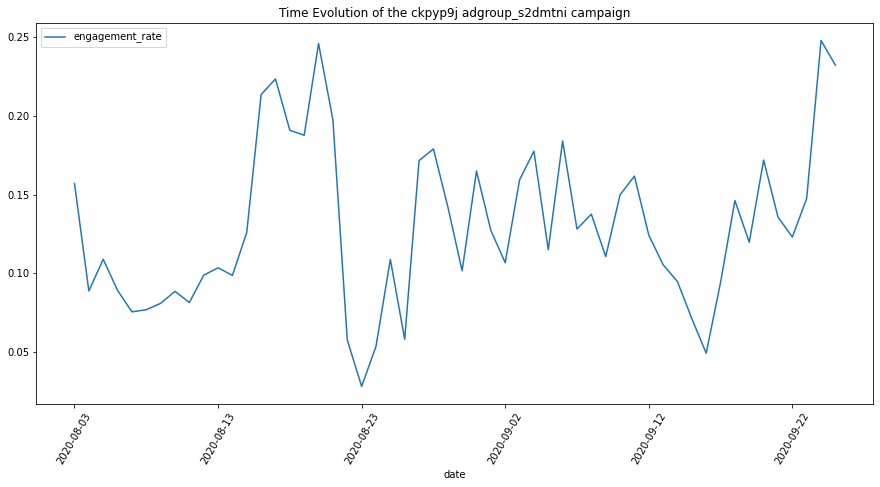

In [88]:

adgroups_s2dmtni_ckpyp9j = adgroups_s2dmtni.get_group('ckpyp9j')
adgroups_s2dmtni_ckpyp9j.plot(x='date', y='engagement_rate', figsize=(15,7))
plt.title('Time Evolution of the ckpyp9j adgroup_s2dmtni campaign')
plt.xticks(rotation=60)
plt.show()

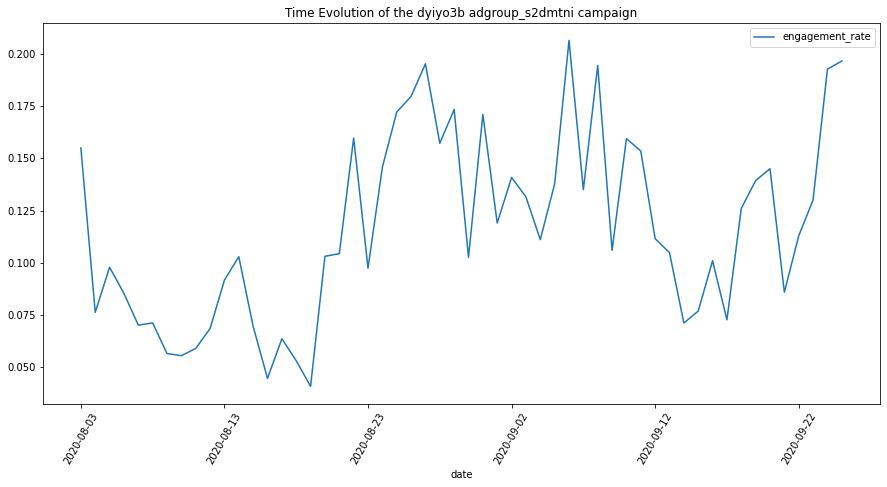

In [89]:
adgroups_s2dmtni_dyiyo3b = adgroups_s2dmtni.get_group('dyiyo3b')
adgroups_s2dmtni_dyiyo3b.plot(x='date', y='engagement_rate', figsize=(15,7))
plt.title('Time Evolution of the dyiyo3b adgroup_s2dmtni campaign')
plt.xticks(rotation=60)
plt.show()

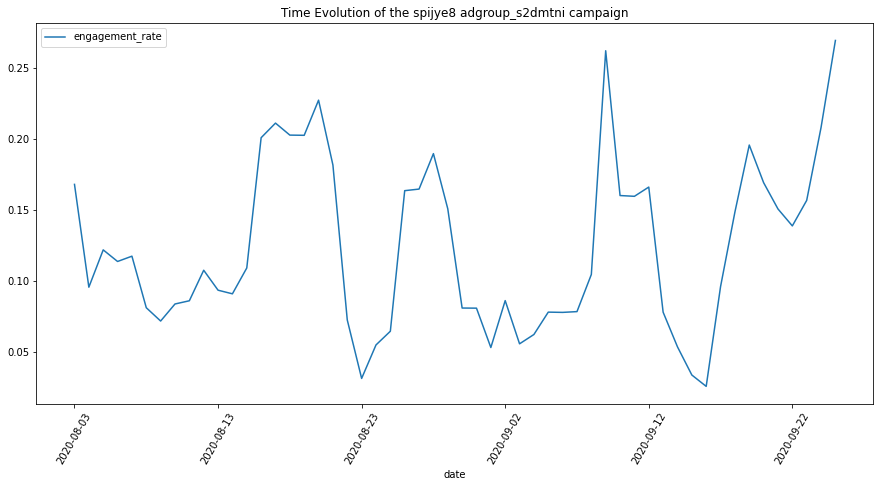

In [90]:
adgroups_s2dmtni_spijye8 = adgroups_s2dmtni.get_group('spijye8')
adgroups_s2dmtni_spijye8.plot(x='date', y='engagement_rate', figsize=(15,7))
plt.title('Time Evolution of the spijye8 adgroup_s2dmtni campaign')
plt.xticks(rotation=60)
plt.show()

#### The uwyvrja campaign

In [91]:
adgroups_uwyvrja = uwyvrja.groupby('item_id')
list(adgroups_uwyvrja.groups)

['158d2i4', '52nuiyr', 'cbr81rt', 'f755tsf', 'fbsam05', 'i4li3e7', 'pwix0yl']

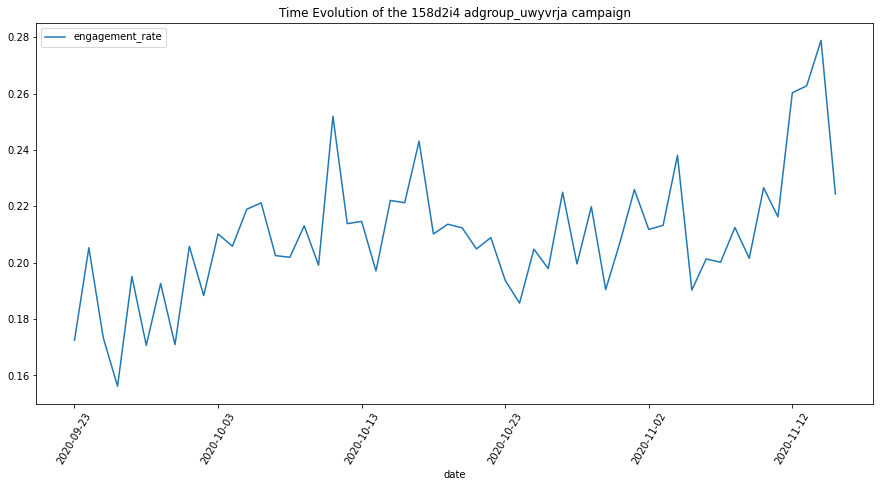

In [92]:
adgroups_uwyvrja_158d2i4 = adgroups_uwyvrja.get_group('158d2i4')
adgroups_uwyvrja_158d2i4.plot(x='date', y='engagement_rate', figsize=(15,7))
plt.title('Time Evolution of the 158d2i4 adgroup_uwyvrja campaign')
plt.xticks(rotation=60)
plt.show()

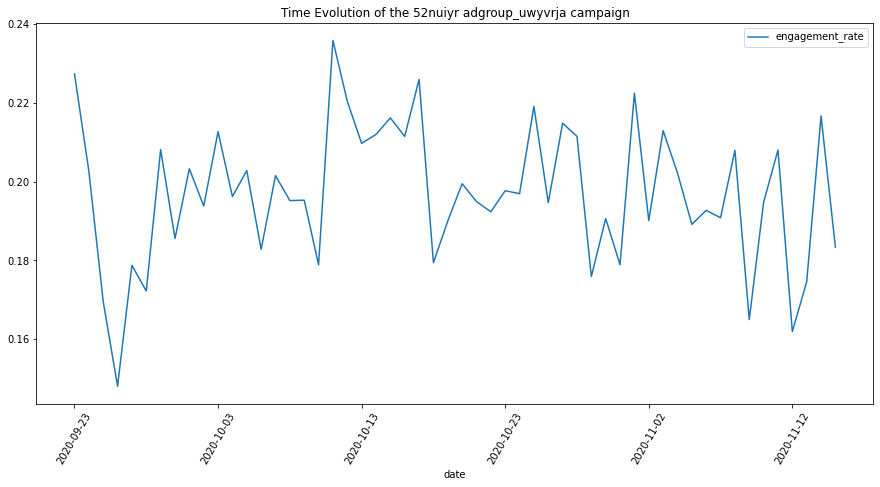

In [93]:
adgroups_uwyvrja_52nuiyr = adgroups_uwyvrja.get_group('52nuiyr')
adgroups_uwyvrja_52nuiyr.plot(x='date', y='engagement_rate', figsize=(15,7))
plt.title('Time Evolution of the 52nuiyr adgroup_uwyvrja campaign')
plt.xticks(rotation=60)
plt.show()

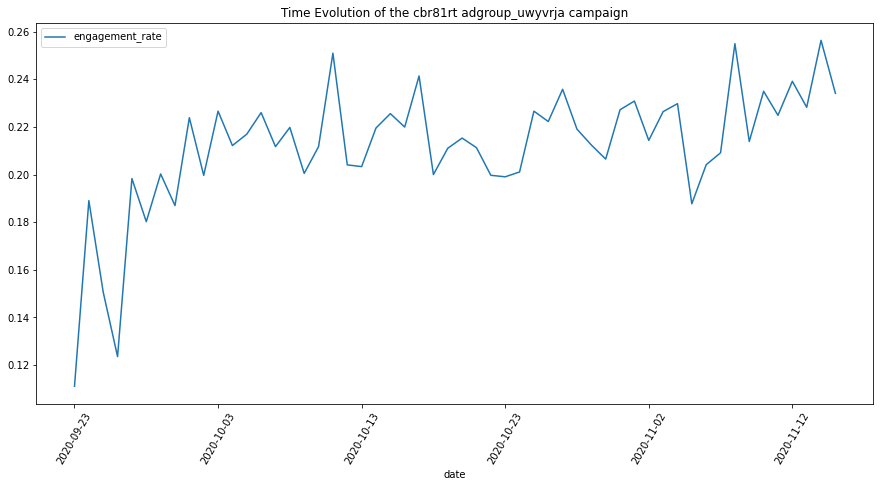

In [94]:
adgroups_uwyvrja_cbr81rt = adgroups_uwyvrja.get_group('cbr81rt')
adgroups_uwyvrja_cbr81rt.plot(x='date', y='engagement_rate', figsize=(15,7))
plt.title('Time Evolution of the cbr81rt adgroup_uwyvrja campaign')
plt.xticks(rotation=60)
plt.show()

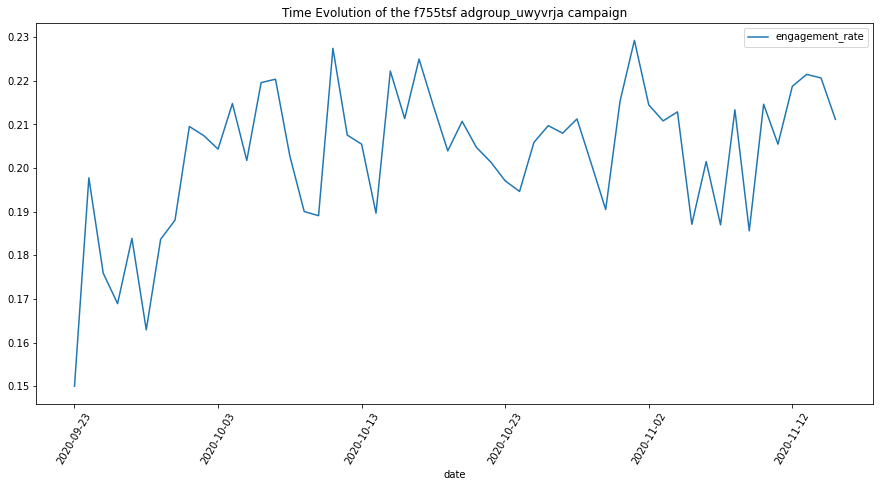

In [95]:
adgroups_uwyvrja_f755tsf = adgroups_uwyvrja.get_group('f755tsf')
adgroups_uwyvrja_f755tsf.plot(x='date', y='engagement_rate', figsize=(15,7))
plt.title('Time Evolution of the f755tsf adgroup_uwyvrja campaign')
plt.xticks(rotation=60)
plt.show()

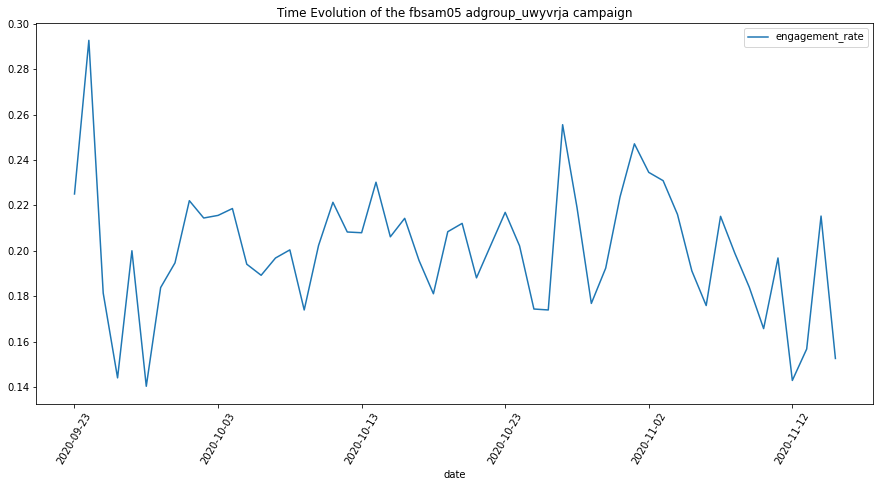

In [96]:
adgroups_uwyvrja_fbsam05 = adgroups_uwyvrja.get_group('fbsam05')
adgroups_uwyvrja_fbsam05.plot(x='date', y='engagement_rate', figsize=(15,7))
plt.title('Time Evolution of the fbsam05 adgroup_uwyvrja campaign')
plt.xticks(rotation=60)
plt.show()

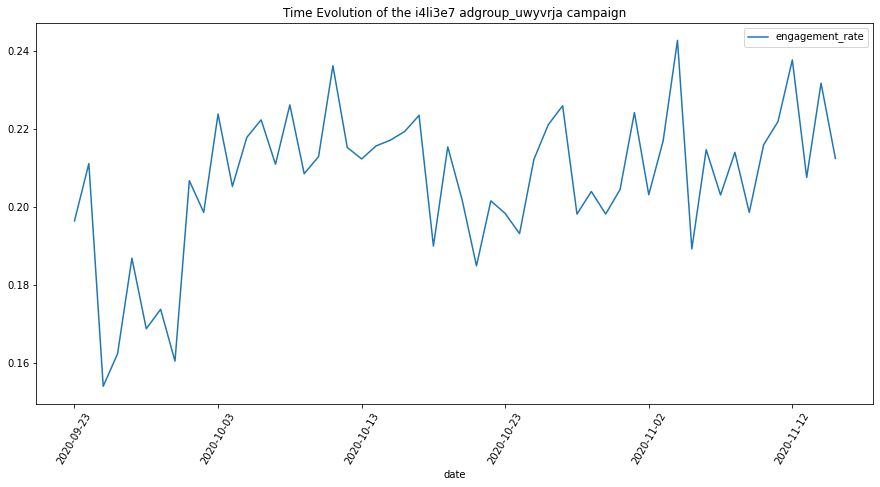

In [97]:
adgroups_uwyvrja_i4li3e7 = adgroups_uwyvrja.get_group('i4li3e7')
adgroups_uwyvrja_i4li3e7.plot(x='date', y='engagement_rate', figsize=(15,7))
plt.title('Time Evolution of the i4li3e7 adgroup_uwyvrja campaign')
plt.xticks(rotation=60)
plt.show()

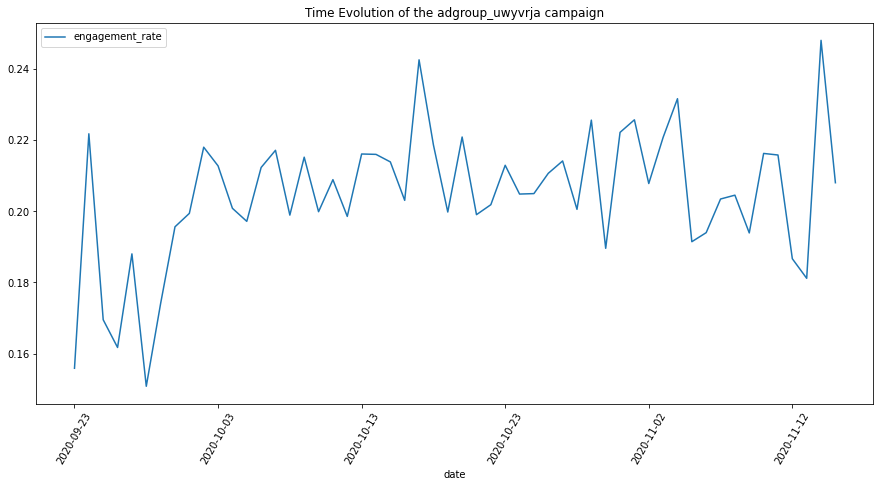

In [98]:
adgroups_uwyvrja_pwix0yl = adgroups_uwyvrja.get_group('pwix0yl')
adgroups_uwyvrja_pwix0yl.plot(x='date', y='engagement_rate', figsize=(15,7))
plt.title('Time Evolution of the adgroup_uwyvrja campaign')
plt.xticks(rotation=60)
plt.show()

#### The wqgxoc1 campaign

In [99]:
adgroups_wqgxoc1 = wqgxoc1.groupby('item_id')
list(adgroups_wqgxoc1.groups)

['fhz2zmt', 'fjlyqpn', 's1gj6o7', 'sgpzec0', 'unwvpjo', 'x4v3qql']

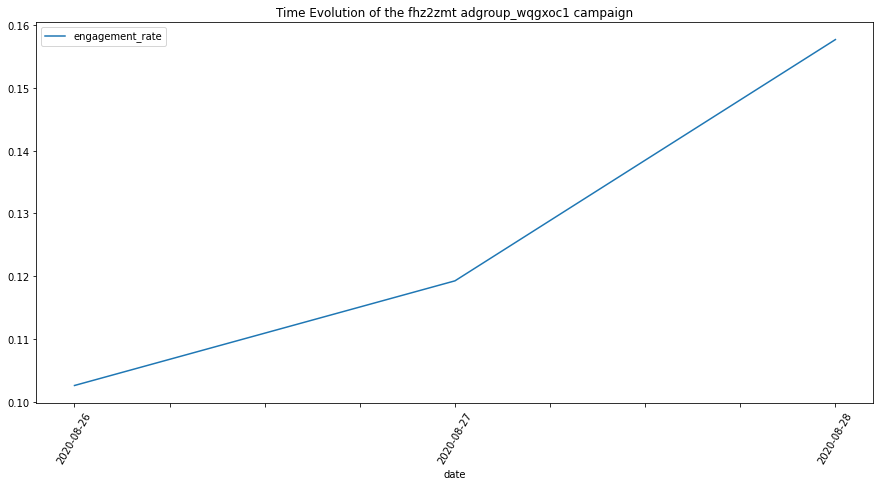

In [100]:
adgroups_wqgxoc1_fhz2zmt = adgroups_wqgxoc1.get_group('fhz2zmt')
adgroups_wqgxoc1_fhz2zmt.plot(x='date', y='engagement_rate', figsize=(15,7))
plt.title('Time Evolution of the fhz2zmt adgroup_wqgxoc1 campaign')
plt.xticks(rotation=60)
plt.show()

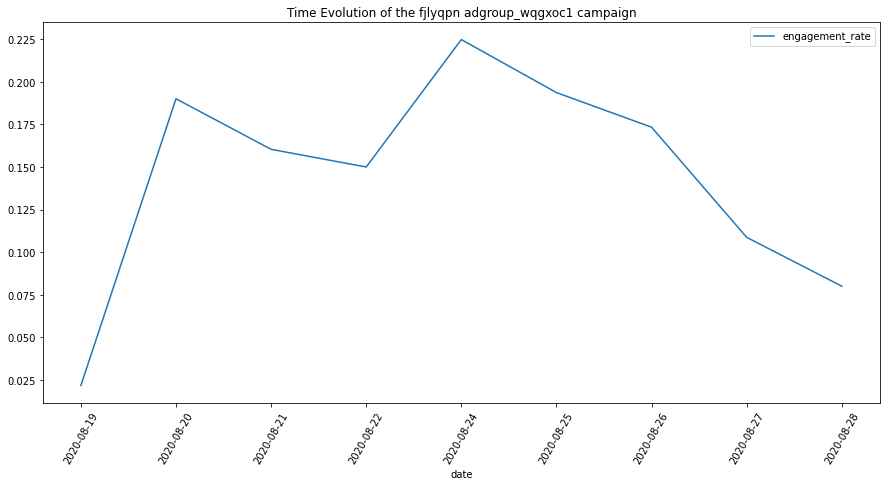

In [101]:
adgroups_wqgxoc1_fjlyqpn = adgroups_wqgxoc1.get_group('fjlyqpn')
adgroups_wqgxoc1_fjlyqpn.plot(x='date', y='engagement_rate', figsize=(15,7))
plt.title('Time Evolution of the fjlyqpn adgroup_wqgxoc1 campaign')
plt.xticks(rotation=60)
plt.show()

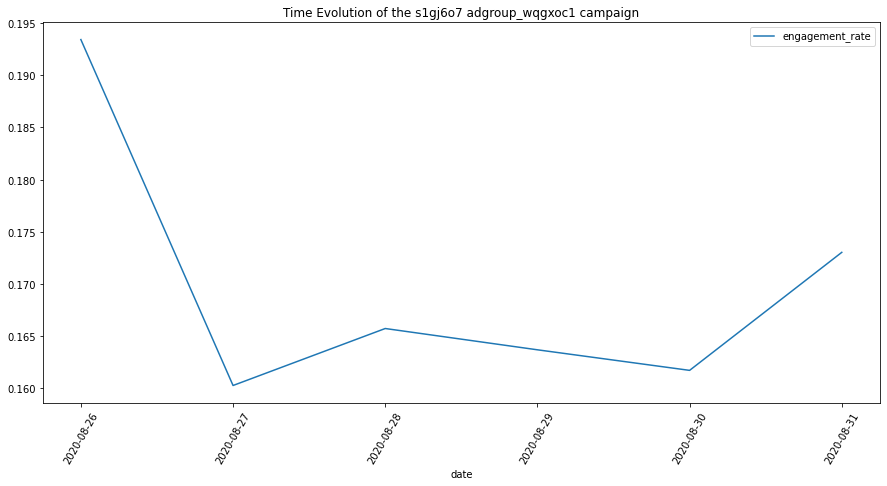

In [102]:
adgroups_wqgxoc1_s1gj6o7 = adgroups_wqgxoc1.get_group('s1gj6o7')
adgroups_wqgxoc1_s1gj6o7.plot(x='date', y='engagement_rate', figsize=(15,7))
plt.title('Time Evolution of the s1gj6o7 adgroup_wqgxoc1 campaign')
plt.xticks(rotation=60)
plt.show()

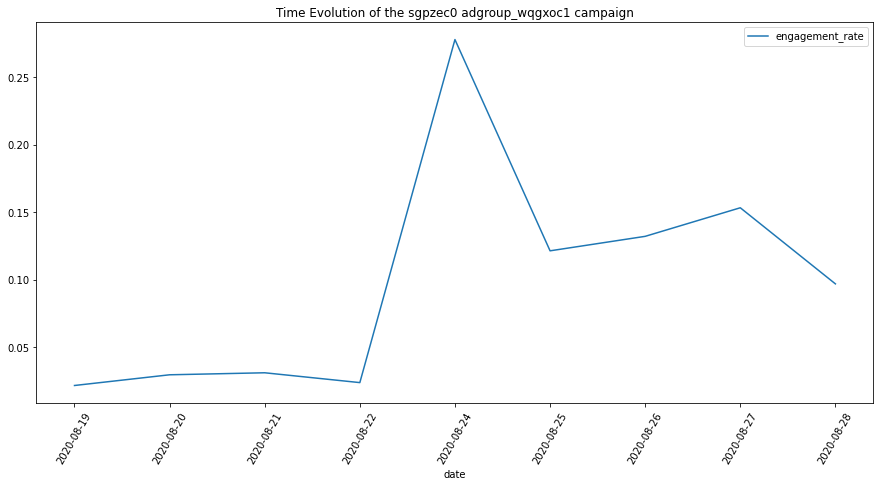

In [103]:
adgroups_wqgxoc1_sgpzec0 = adgroups_wqgxoc1.get_group('sgpzec0')
adgroups_wqgxoc1_sgpzec0.plot(x='date', y='engagement_rate', figsize=(15,7))
plt.title('Time Evolution of the sgpzec0 adgroup_wqgxoc1 campaign')
plt.xticks(rotation=60)
plt.show()

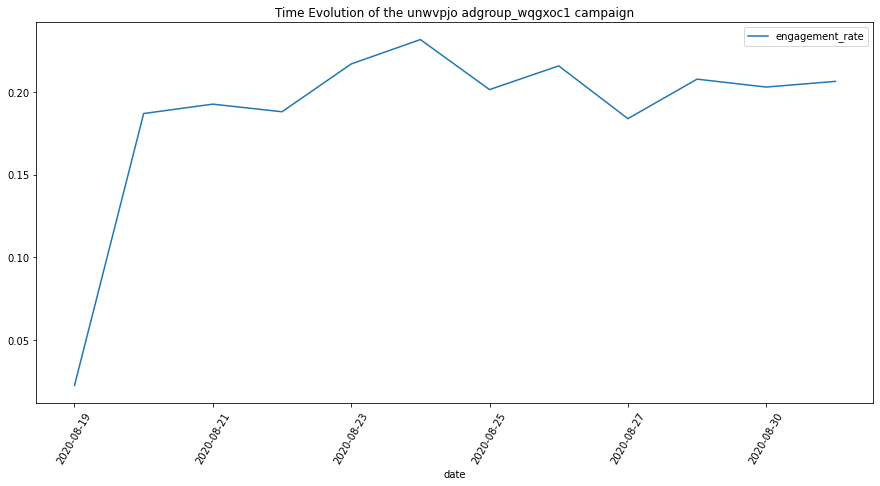

In [104]:
adgroups_wqgxoc1_unwvpjo = adgroups_wqgxoc1.get_group('unwvpjo')
adgroups_wqgxoc1_unwvpjo.plot(x='date', y='engagement_rate', figsize=(15,7))
plt.title('Time Evolution of the unwvpjo adgroup_wqgxoc1 campaign')
plt.xticks(rotation=60)
plt.show()

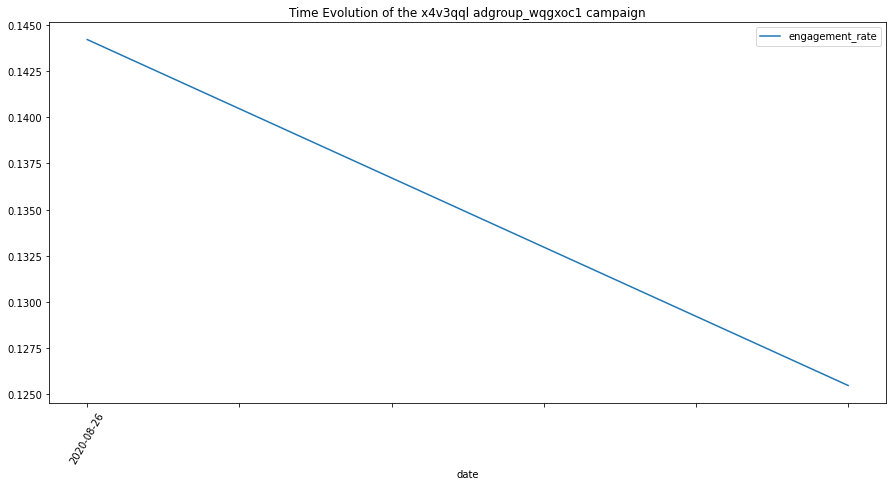

In [105]:
adgroups_wqgxoc1_x4v3qql = adgroups_wqgxoc1.get_group('x4v3qql')
adgroups_wqgxoc1_x4v3qql.plot(x='date', y='engagement_rate', figsize=(15,7))
plt.title('Time Evolution of the x4v3qql adgroup_wqgxoc1 campaign')
plt.xticks(rotation=60)
plt.show()

The time evolution of the engagement rate for the 's2dmtni' and 'uwyvrja' campaigns had components of seasonality and trend as they were periodic in nature. The 'wqgxoc1' campaign on the other hand was non-seasonal and did not contain any trends.

### Click Through Rate Time Evolution (ER)

#### The s2dmtni campaign

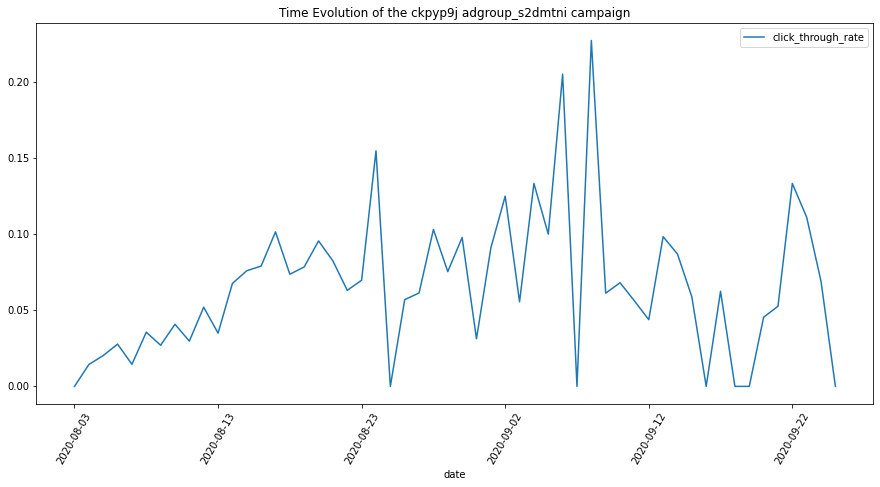

In [106]:

adgroups_s2dmtni_ckpyp9j = adgroups_s2dmtni.get_group('ckpyp9j')
adgroups_s2dmtni_ckpyp9j.plot(x='date', y='click_through_rate', figsize=(15,7))
plt.title('Time Evolution of the ckpyp9j adgroup_s2dmtni campaign')
plt.xticks(rotation=60)
plt.show()

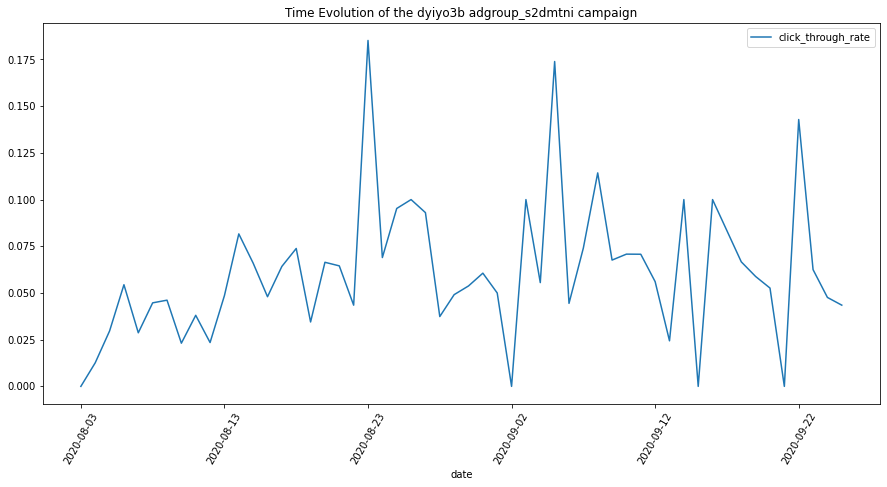

In [107]:
adgroups_s2dmtni_dyiyo3b = adgroups_s2dmtni.get_group('dyiyo3b')
adgroups_s2dmtni_dyiyo3b.plot(x='date', y='click_through_rate', figsize=(15,7))
plt.title('Time Evolution of the dyiyo3b adgroup_s2dmtni campaign')
plt.xticks(rotation=60)
plt.show()

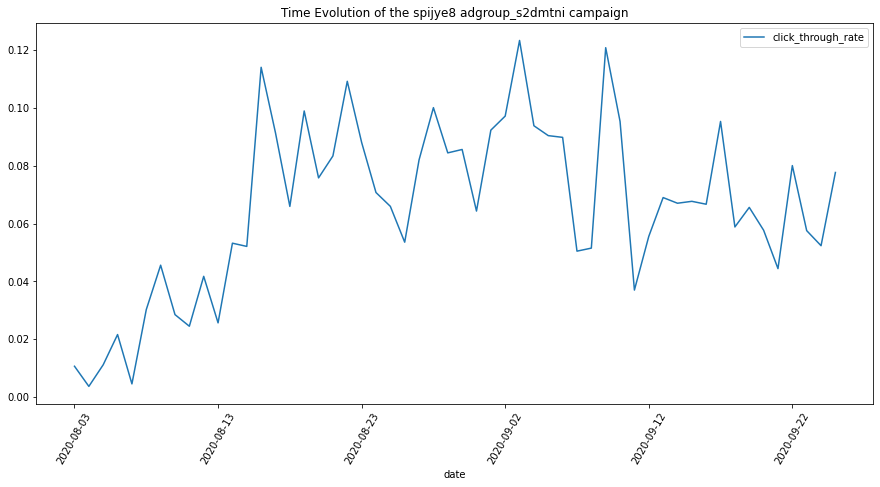

In [108]:
adgroups_s2dmtni_spijye8 = adgroups_s2dmtni.get_group('spijye8')
adgroups_s2dmtni_spijye8.plot(x='date', y='click_through_rate', figsize=(15,7))
plt.title('Time Evolution of the spijye8 adgroup_s2dmtni campaign')
plt.xticks(rotation=60)
plt.show()

#### The uwyvrja campaign

In [109]:
adgroups_uwyvrja = uwyvrja.groupby('item_id')
list(adgroups_uwyvrja.groups)

['158d2i4', '52nuiyr', 'cbr81rt', 'f755tsf', 'fbsam05', 'i4li3e7', 'pwix0yl']

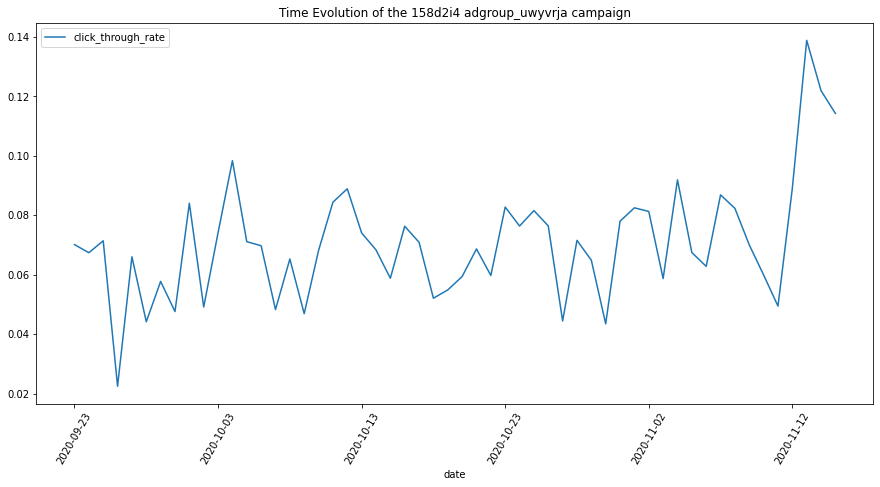

In [110]:
adgroups_uwyvrja_158d2i4 = adgroups_uwyvrja.get_group('158d2i4')
adgroups_uwyvrja_158d2i4.plot(x='date', y='click_through_rate', figsize=(15,7))
plt.title('Time Evolution of the 158d2i4 adgroup_uwyvrja campaign')
plt.xticks(rotation=60)
plt.show()

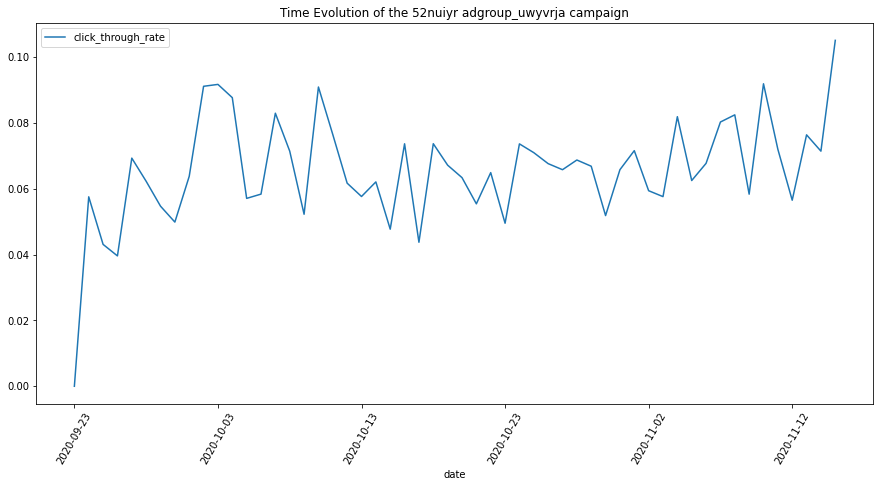

In [111]:
adgroups_uwyvrja_52nuiyr = adgroups_uwyvrja.get_group('52nuiyr')
adgroups_uwyvrja_52nuiyr.plot(x='date', y='click_through_rate', figsize=(15,7))
plt.title('Time Evolution of the 52nuiyr adgroup_uwyvrja campaign')
plt.xticks(rotation=60)
plt.show()

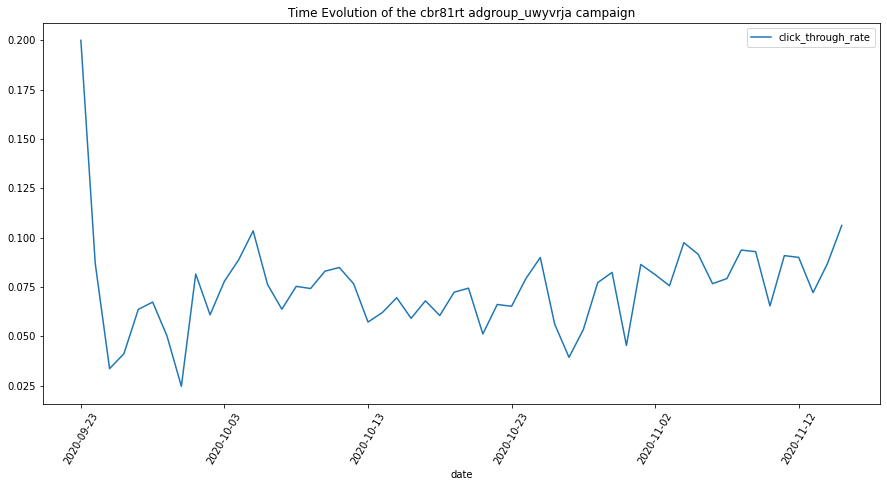

In [112]:
adgroups_uwyvrja_cbr81rt = adgroups_uwyvrja.get_group('cbr81rt')
adgroups_uwyvrja_cbr81rt.plot(x='date', y='click_through_rate', figsize=(15,7))
plt.title('Time Evolution of the cbr81rt adgroup_uwyvrja campaign')
plt.xticks(rotation=60)
plt.show()

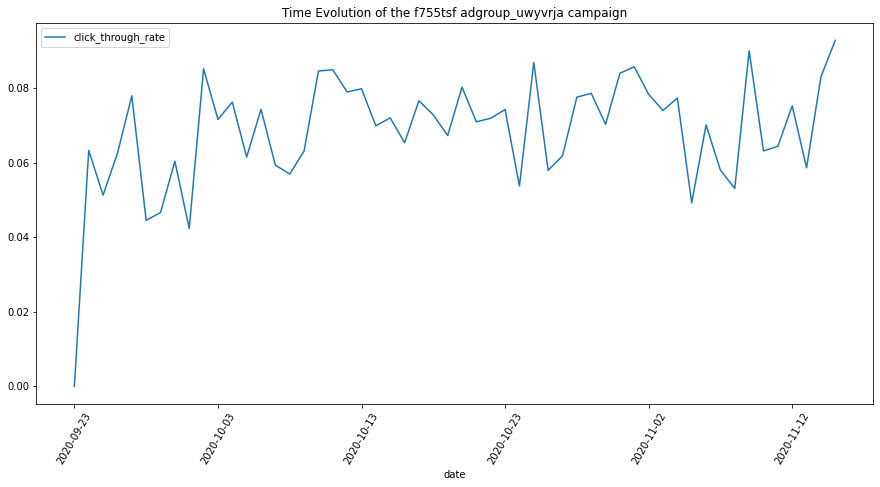

In [113]:
adgroups_uwyvrja_f755tsf = adgroups_uwyvrja.get_group('f755tsf')
adgroups_uwyvrja_f755tsf.plot(x='date', y='click_through_rate', figsize=(15,7))
plt.title('Time Evolution of the f755tsf adgroup_uwyvrja campaign')
plt.xticks(rotation=60)
plt.show()

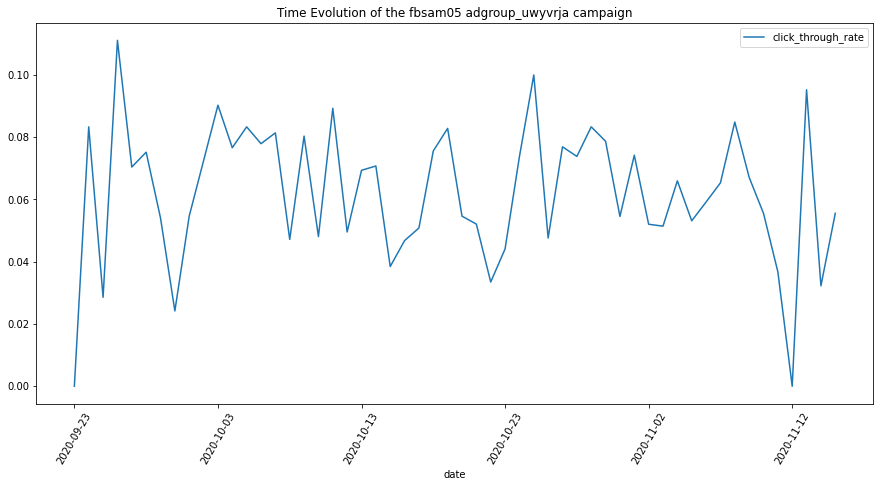

In [114]:
adgroups_uwyvrja_fbsam05 = adgroups_uwyvrja.get_group('fbsam05')
adgroups_uwyvrja_fbsam05.plot(x='date', y='click_through_rate', figsize=(15,7))
plt.title('Time Evolution of the fbsam05 adgroup_uwyvrja campaign')
plt.xticks(rotation=60)
plt.show()

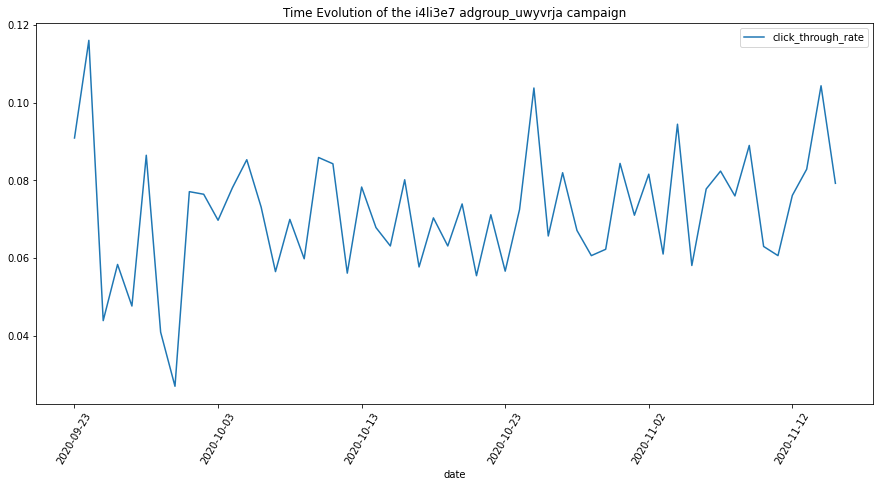

In [115]:
adgroups_uwyvrja_i4li3e7 = adgroups_uwyvrja.get_group('i4li3e7')
adgroups_uwyvrja_i4li3e7.plot(x='date', y='click_through_rate', figsize=(15,7))
plt.title('Time Evolution of the i4li3e7 adgroup_uwyvrja campaign')
plt.xticks(rotation=60)
plt.show()

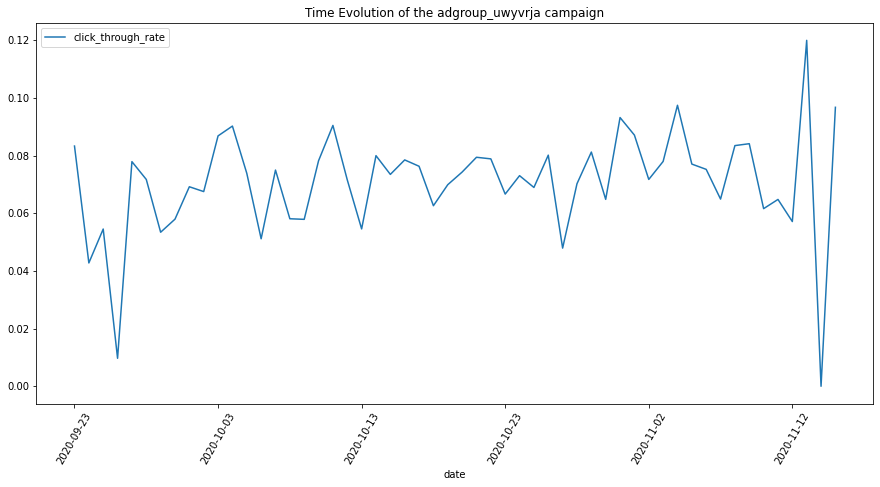

In [116]:
adgroups_uwyvrja_pwix0yl = adgroups_uwyvrja.get_group('pwix0yl')
adgroups_uwyvrja_pwix0yl.plot(x='date', y='click_through_rate', figsize=(15,7))
plt.title('Time Evolution of the adgroup_uwyvrja campaign')
plt.xticks(rotation=60)
plt.show()

#### The wqgxoc1 campaign

In [117]:
adgroups_wqgxoc1 = wqgxoc1.groupby('item_id')
list(adgroups_wqgxoc1.groups)

['fhz2zmt', 'fjlyqpn', 's1gj6o7', 'sgpzec0', 'unwvpjo', 'x4v3qql']

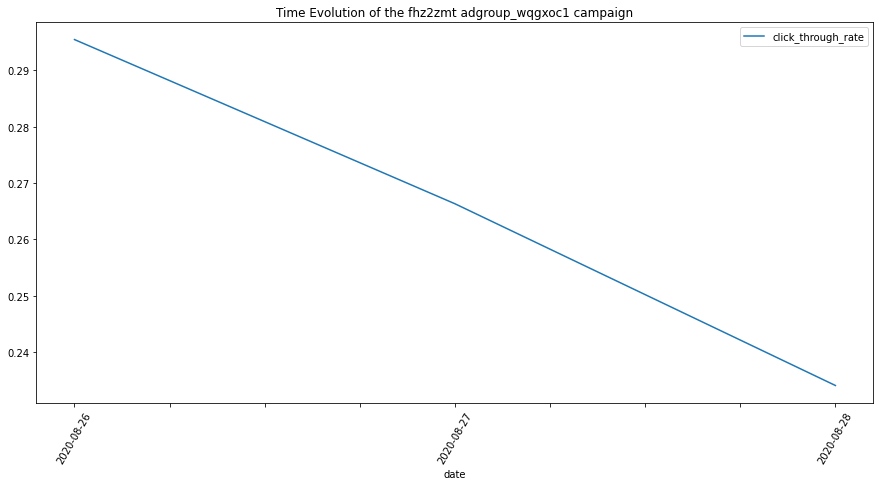

In [118]:
adgroups_wqgxoc1_fhz2zmt = adgroups_wqgxoc1.get_group('fhz2zmt')
adgroups_wqgxoc1_fhz2zmt.plot(x='date', y='click_through_rate', figsize=(15,7))
plt.title('Time Evolution of the fhz2zmt adgroup_wqgxoc1 campaign')
plt.xticks(rotation=60)
plt.show()

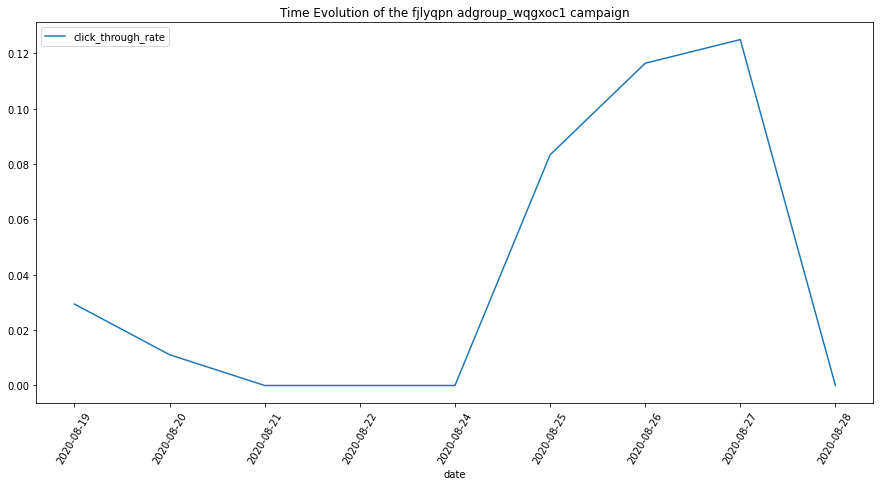

In [119]:
adgroups_wqgxoc1_fjlyqpn = adgroups_wqgxoc1.get_group('fjlyqpn')
adgroups_wqgxoc1_fjlyqpn.plot(x='date', y='click_through_rate', figsize=(15,7))
plt.title('Time Evolution of the fjlyqpn adgroup_wqgxoc1 campaign')
plt.xticks(rotation=60)
plt.show()

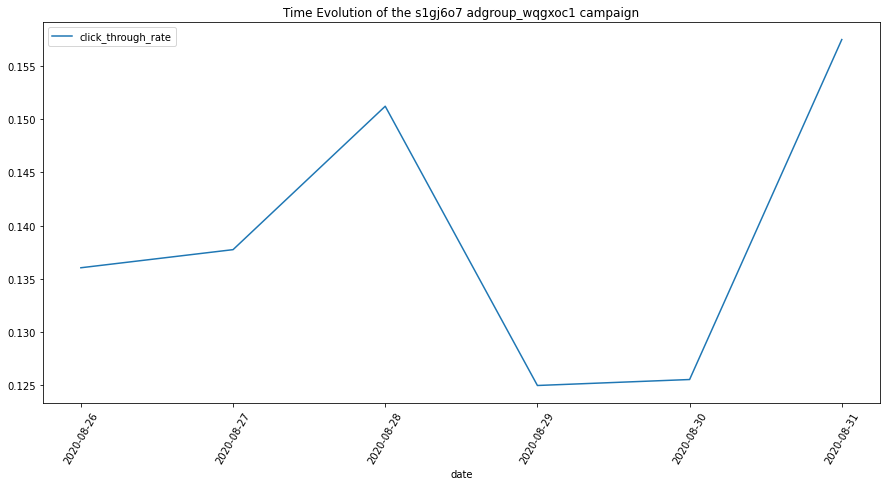

In [120]:
adgroups_wqgxoc1_s1gj6o7 = adgroups_wqgxoc1.get_group('s1gj6o7')
adgroups_wqgxoc1_s1gj6o7.plot(x='date', y='click_through_rate', figsize=(15,7))
plt.title('Time Evolution of the s1gj6o7 adgroup_wqgxoc1 campaign')
plt.xticks(rotation=60)
plt.show()

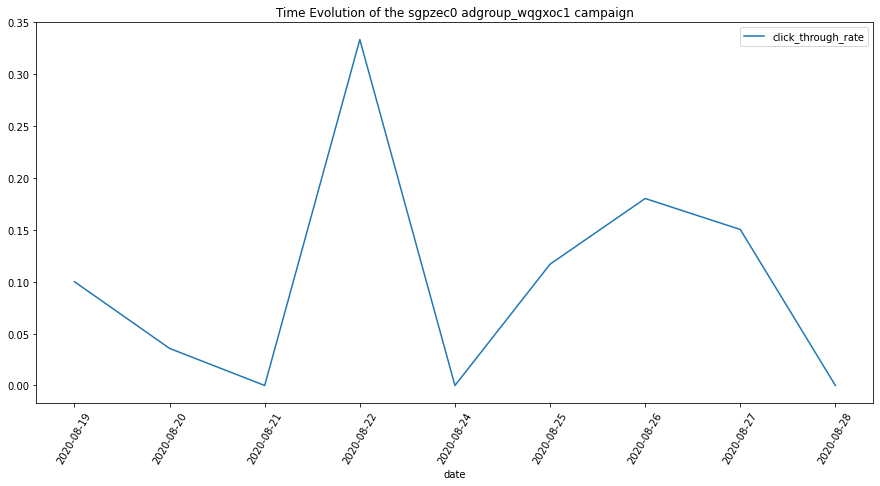

In [121]:
adgroups_wqgxoc1_sgpzec0 = adgroups_wqgxoc1.get_group('sgpzec0')
adgroups_wqgxoc1_sgpzec0.plot(x='date', y='click_through_rate', figsize=(15,7))
plt.title('Time Evolution of the sgpzec0 adgroup_wqgxoc1 campaign')
plt.xticks(rotation=60)
plt.show()

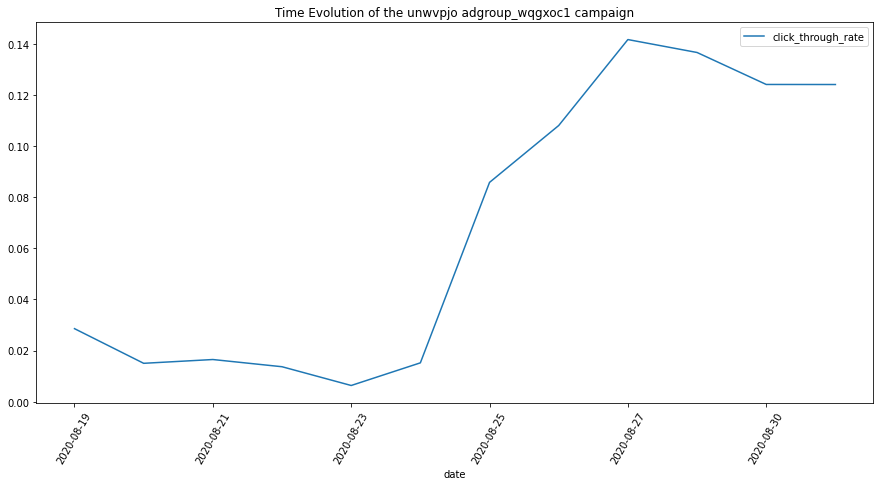

In [122]:
adgroups_wqgxoc1_unwvpjo = adgroups_wqgxoc1.get_group('unwvpjo')
adgroups_wqgxoc1_unwvpjo.plot(x='date', y='click_through_rate', figsize=(15,7))
plt.title('Time Evolution of the unwvpjo adgroup_wqgxoc1 campaign')
plt.xticks(rotation=60)
plt.show()

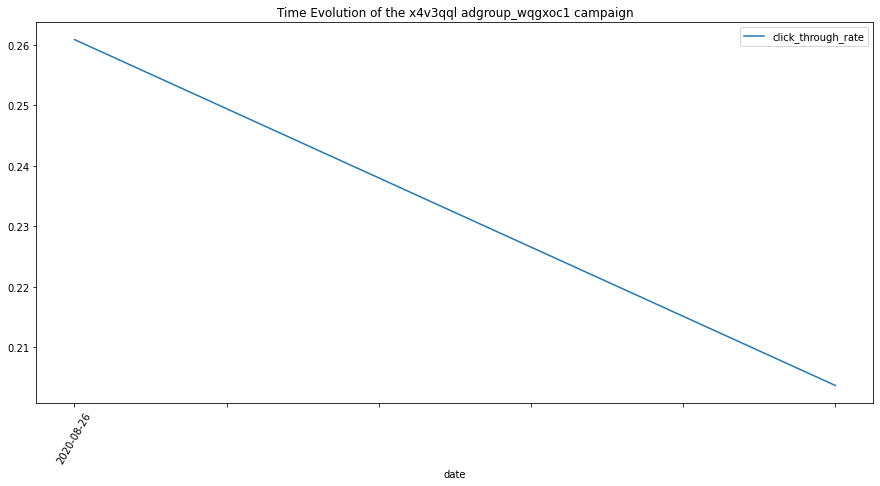

In [123]:
adgroups_wqgxoc1_x4v3qql = adgroups_wqgxoc1.get_group('x4v3qql')
adgroups_wqgxoc1_x4v3qql.plot(x='date', y='click_through_rate', figsize=(15,7))
plt.title('Time Evolution of the x4v3qql adgroup_wqgxoc1 campaign')
plt.xticks(rotation=60)
plt.show()

The time evolution of the click through rate for the 's2dmtni' and 'uwyvrja' campaigns had components of seasonality and trend as they were periodic in nature. The 'wqgxoc1' campaign on the other hand was non-seasonal and did not contain any trends.

## Task 2

Another piece of information we have is in the form of a csv file from TTD - the ad trade desk - the changes that were committed for each campaign and adgroup. It is inside the data directory of the repo.  
Primary key column contains both adgroup ids (item_id) and campaign id (item_group_id)
User column contains changes to the adgroup features -  using the algorithm api itself (called ‘ttd_api_ay6wyin@adludio.com’). Any other user belongs to one of the campaign managers.
Specifically, you’re expected to look at Adgroup/Adgroup flight changes with the column name ‘BudgetInAdvertiserCurrency’. And ofcourse, the datetime at which the changes were made. Ignore all other column entries.

We want you to explore both the daily aggregated data and the api changes response csv file, combine them in a way you see fit and present your findings  - for any evidence to see who (the campaign manager or the algorithm api) caused these budget changes and if any of these changes resulted in a performance change.


In [125]:
#importing the data
data = pd.read_csv('/GLOBAL-461053 Adludio History 2021-02-26.csv')

In [126]:
#printing the first five rows
data.head()

,modifiedon,user,table,column,OldValue,NewValue,primarykey,secondarykey,modifiedby,source
0,2021-02-19 15:32:05.1885877,angela.yu@adludio.com,CampaignFlight,EndDateExclusiveUTC,2021-02-23T04:59:00,2021-02-22T04:59:00,rf33gwg,2023334,ttd_api,.Net SqlClient Data Provider
1,2021-02-18 01:51:18.8845678,angela.yu@adludio.com,CampaignFlight,EndDateExclusiveUTC,2021-03-01T04:59:00,2021-02-23T04:59:00,rf33gwg,2023334,ttd_api,.Net SqlClient Data Provider
2,2021-02-12 17:15:49.9365387,angela.yu@adludio.com,AdGroupFlight,BudgetInAdvertiserCurrency,2980.000000,3874.000000,gehehl7,2037170,ttd_api,.Net SqlClient Data Provider
3,2021-02-12 17:15:49.9365387,angela.yu@adludio.com,AdGroupFlight,BudgetInAdvertiserCurrency,2980.000000,2086.000000,oropida,2037170,ttd_api,.Net SqlClient Data Provider
4,2021-02-12 17:15:49.9209108,angela.yu@adludio.com,AdGroup,BudgetInAdvertiserCurrency,6476.920000,7370.920000,gehehl7,(null),ttd_api,.Net SqlClient Data Provider


In [127]:
#filltering data to get required rows with the column name ‘BudgetInAdvertiserCurrency’.
budget = data.loc[data['column'] == 'BudgetInAdvertiserCurrency']
budget.head()

,modifiedon,user,table,column,OldValue,NewValue,primarykey,secondarykey,modifiedby,source
2,2021-02-12 17:15:49.9365387,angela.yu@adludio.com,AdGroupFlight,BudgetInAdvertiserCurrency,2980.000000,3874.000000,gehehl7,2037170,ttd_api,.Net SqlClient Data Provider
3,2021-02-12 17:15:49.9365387,angela.yu@adludio.com,AdGroupFlight,BudgetInAdvertiserCurrency,2980.000000,2086.000000,oropida,2037170,ttd_api,.Net SqlClient Data Provider
4,2021-02-12 17:15:49.9209108,angela.yu@adludio.com,AdGroup,BudgetInAdvertiserCurrency,6476.920000,7370.920000,gehehl7,(null),ttd_api,.Net SqlClient Data Provider
5,2021-02-12 17:15:49.9209108,angela.yu@adludio.com,AdGroup,BudgetInAdvertiserCurrency,13360.890000,12466.890000,oropida,(null),ttd_api,.Net SqlClient Data Provider
18,2021-02-11 12:23:11.9851841,ttd_api_ay6wyin@adludio.com,AdGroupFlight,BudgetInAdvertiserCurrency,913.000000,1272.657729,gq012j8,2023334,ttd_publicapi,.Net SqlClient Data Provider


In [128]:
#filtering data to get rows with Adgroup/Adgroup flight table column  
budget = budget.loc[(budget['table'] == 'AdGroupFlight') | (budget['table'] == 'AdGroup')]


In [129]:
#the new dataset contains 578 entries with no null values
budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578 entries, 2 to 3006
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   modifiedon    578 non-null    object
 1   user          578 non-null    object
 2   table         578 non-null    object
 3   column        578 non-null    object
 4   OldValue      578 non-null    object
 5   NewValue      578 non-null    object
 6   primarykey    578 non-null    object
 7   secondarykey  578 non-null    object
 8   modifiedby    578 non-null    object
 9   source        578 non-null    object
dtypes: object(10)
memory usage: 49.7+ KB


In [131]:
#changing data types
budget[["OldValue", "NewValue"]] = budget[["OldValue", "NewValue"]].apply(pd.to_numeric, errors='coerce')

In [ ]:
#merge budget and df dataframes
combined_df = pd.merge(df, budget, left_on=)